In [31]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, r_regression
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
from ast import Num
%matplotlib inline


# **Scikit-learn datasets**

```All Scikit-learn datasets present the following methods:```
* DESCR: This provides a general description of the dataset
* data: This contains all the features
* feature_names: This reports the names of the features
* target: This contains the target values expressed as values or numbered classes
* target_names: This reports the names of the classes in the target
* shape: This is a method that you can apply to both .data and .target; 

In [59]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
boston_df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_df = pd.concat([boston_df, pd.DataFrame(
    data=boston_dataset.target, columns=['target'])], axis=1)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
# seleccionar las mejores K caracteristicas segun score_funct para realizar la prediccion
# por ejemplo si score_func =r_regression se refiere a correlation coefficient y si
# score_func =f_regression se refiere al estadistico f
selector = SelectKBest(score_func=f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print(X.shape)


(506, 1)


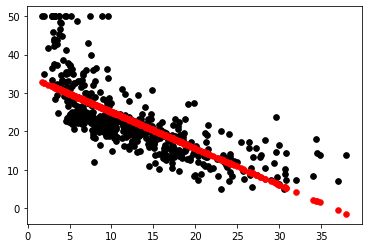

In [63]:
regressor = LinearRegression().fit(X, Y)

plt.scatter(X, Y, s=32, marker='o', facecolors='black')
plt.scatter(X, regressor.predict(X), color='red', linewidth=0.5)
plt.show()


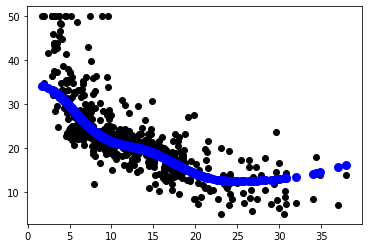

In [64]:
'''utilizar una Maquina de Vectores de apoyo (SVM) para resolver la no linealidad'''

regressor = SVR()
regressor.fit(X, Y)
plt.scatter(X, Y, color='black')
plt.scatter(X, regressor.predict(X), color='blue', linewidth=3)
plt.show()


# **LIBSVM data examples**

If you want to load a dataset, first go to the web page where you can visualize the data on
your browser. In the case of our example, visit

In [71]:
from sklearn.datasets import load_svmlight_file
import urllib
from urllib.request import urlopen
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a'
a2a = urlopen(target_page)
X_train, y_train = load_svmlight_file(a2a)
print(X_train.shape, y_train.shape)


(1605, 119) (1605,)


# **Loading data directly from CSV or text files**
Algunas veces es necesario que tenga que descargar los datasets directamente desde el repositorio.

 Por ejemplo para analizar los datos de la vivienda de boston actuales primero hay q descargar el archivo .csv para el directorio local. como las variables son todas numericas(13 continuas y una binaria) la forma mas rapido de cargarlo es en con la funcion *loadtxt* y cargar los datos en un array y se ahorra mucha memria ya que no requiere ninguna depuracion en memoria 

In [76]:
housing = np.loadtxt('resources/regression-datasets-housing.csv',
                     delimiter=',')
print(type(housing))
# help(np.loadtxt)

<class 'numpy.ndarray'>


# **Scikit-learn sample generators**

In [83]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10**6, n_features=10, random_state=101)
print(X.shape, y.shape)


(1000000, 10) (1000000,)


# **Saber el tiempo que demora una operacion**

In [79]:
%timeit X, y = datasets.make_classification(n_samples=10**6, n_features=10, random_state=101)


867 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
import sys
!"{sys.executable}" -m pip install numpy